<a href="https://colab.research.google.com/github/Samjoprrc/MiniProject/blob/main/WildfireTrainModel.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Install Dependencies



In [ ]:
# Download YOLOv7 repository and install requirements
!git clone https://github.com/WongKinYiu/yolov7
%cd yolov7
!pip install -r requirements.txt

# Download Correctly Formatted Custom Data




In [50]:

rf = Roboflow(api_key="5xLsF80Q2TApBdiyx5xl")
project = rf.workspace("wildfiredetection-yvihb").project("wildfire-wcmfx")
dataset4 = project.version(12).download("yolov7")


loading Roboflow workspace...
loading Roboflow project...



Extracting Dataset Version Zip to Wildfire-12 in yolov7pytorch:: 100%|██████████| 472/472 [00:00<00:00, 7904.81it/s]


In [2]:
# REPLACE with your custom code snippet generated above
#1
!pip install roboflow

from roboflow import Roboflow
rf = Roboflow(api_key="5xLsF80Q2TApBdiyx5xl")
project = rf.workspace("wildfiredetection-yvihb").project("fire-and-smoke-detection-7gbue")
dataset = project.version(1).download("yolov7")


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 69.0/69.0 kB 2.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 158.3/158.3 kB 12.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 178.7/178.7 kB 26.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 58.8/58.8 kB 5.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 49.1/49.1 MB 16.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 67.8/67.8 kB 10.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 77.5/77.5 kB 9.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 54.5/54.5 kB 7.5 MB/s eta 0:00:00
  Attempting uninstall: pyparsing
    Found existing installation: pyparsing 3.1.1
    Uninstalling pyparsing-3.1.1:
      Successfully uninstalled pyparsing-3.1.1
  Attempting uninstall: opencv-python-headless
    Found existing installation: opencv-python-headless 4.8.1.78
    Uninstalling opencv-python-headless-4.8.1.78:
      Successfully uninsta

loading Roboflow workspace...
loading Roboflow project...


Extracting Dataset Version Zip to Fire-and-Smoke-Detection-1 in yolov7pytorch:: 100%|██████████| 488/488 [00:00<00:00, 9170.34it/s]


In [35]:
#2
rf = Roboflow(api_key="5xLsF80Q2TApBdiyx5xl")
project = rf.workspace("wildfiredetection-yvihb").project("wildfire-wcmfx")
dataset3 = project.version(11).download("yolov7")


loading Roboflow workspace...
loading Roboflow project...



Extracting Dataset Version Zip to Wildfire-11 in yolov7pytorch:: 100%|██████████| 472/472 [00:00<00:00, 3743.64it/s]


# Begin Custom Training

We're ready to start custom training.

NOTE: We will only modify one of the YOLOv7 training defaults in our example: `epochs`. We will adjust from 300 to 100 epochs in our example for speed. If you'd like to change other settings, see details in [our accompanying blog post](https://blog.roboflow.com/yolov7-custom-dataset-training-tutorial/).

In [ ]:
# download COCO starting checkpoint
%cd /content/yolov7
!wget https://github.com/WongKinYiu/yolov7/releases/download/v0.1/yolov7_training.pt

In [ ]:
# run this cell to begin training
%cd /content/yolov7/
!python train.py --batch 16 --epochs 100 --data {dataset.location}/data.yaml --weights 'yolov7_training.pt' --device 0 --cfg cfg/training/yolov7-tiny.yaml


In [81]:
%cd /content/yolov7/
!python train.py --batch 16 --epochs 100 --data {dataset.location}/data.yaml --weights 'runs/train/exp/weights/best.pt' --device 0

/content/yolov7
2024-01-04 23:42:56.248795: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:9261] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2024-01-04 23:42:56.248856: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:607] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2024-01-04 23:42:56.250711: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1515] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2024-01-04 23:42:56.261519: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 AVX512F FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2024-01-04 23:42:57.747304: W

# Evaluation

We can evaluate the performance of our custom training using the provided evalution script.

Note we can adjust the below custom arguments. For details, see [the arguments accepted by detect.py](https://github.com/WongKinYiu/yolov7/blob/main/detect.py#L154).

In [7]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [89]:
# Run evaluation
!python detect.py --weights runs/train/exp/weights/best.pt --conf 0.3 --source {dataset4.location}/test/images


Namespace(weights=['runs/train/exp/weights/best.pt'], source='/content/yolov7/Wildfire-12/test/images', img_size=640, conf_thres=0.3, iou_thres=0.45, device='', view_img=False, save_txt=False, save_conf=False, nosave=False, classes=None, agnostic_nms=False, augment=False, update=False, project='runs/detect', name='exp', exist_ok=False, no_trace=False)
YOLOR 🚀 v0.1-128-ga207844 torch 2.1.0+cu121 CUDA:0 (Tesla T4, 15102.0625MB)

Fusing layers... 
/usr/local/lib/python3.10/dist-packages/torch/functional.py:504: UserWarning: torch.meshgrid: in an upcoming release, it will be required to pass the indexing argument. (Triggered internally at ../aten/src/ATen/native/TensorShape.cpp:3526.)
  return _VF.meshgrid(tensors, **kwargs)  # type: ignore[attr-defined]
Model Summary: 200 layers, 6009343 parameters, 0 gradients, 13.0 GFLOPS
 Convert model to Traced-model... 
 traced_script_module saved! 
 model is traced! 

1 Wildfire, Done. (5.9ms) Inference, (446.0ms) NMS
 The image with the result is s

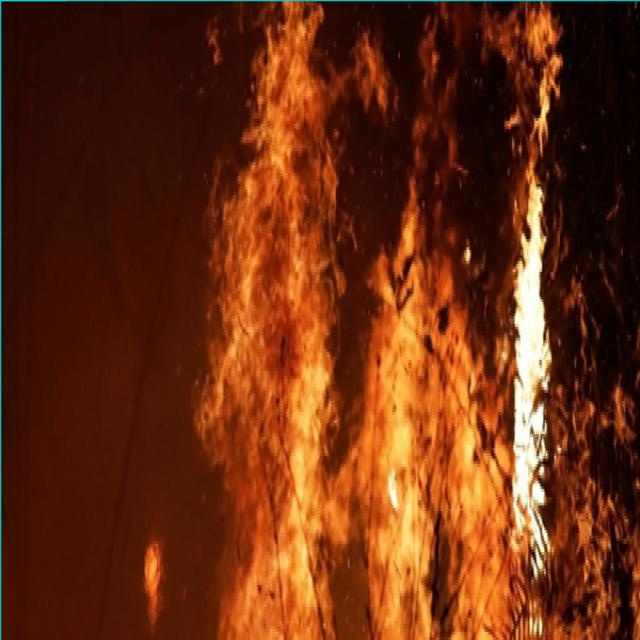

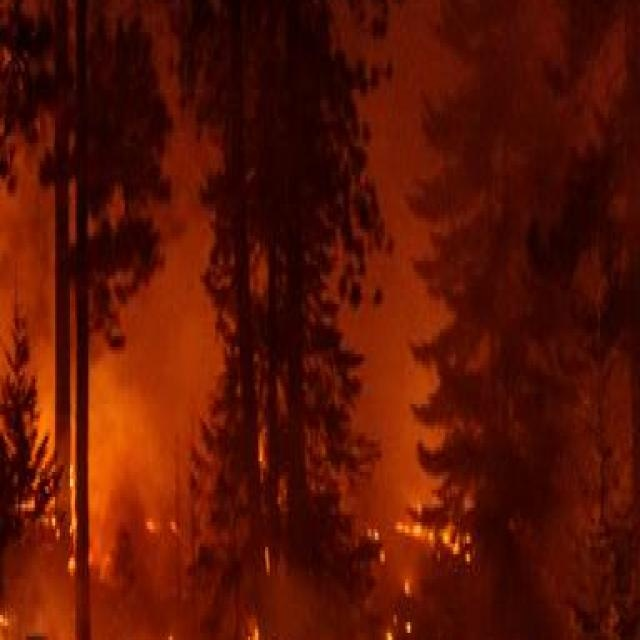

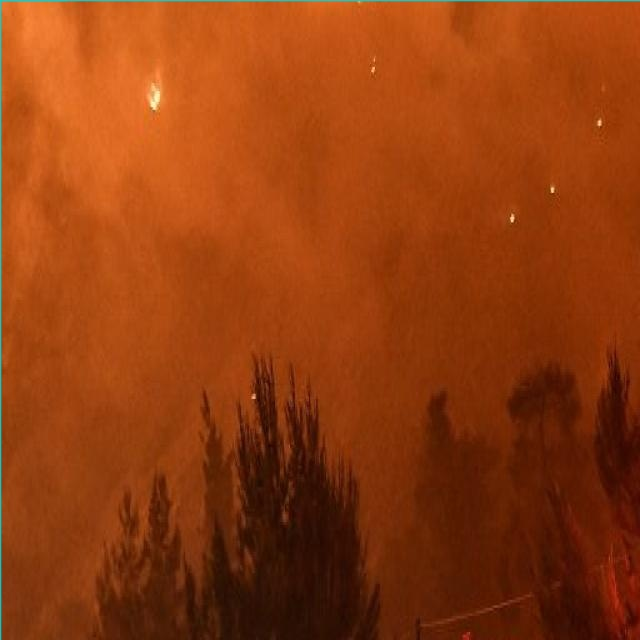

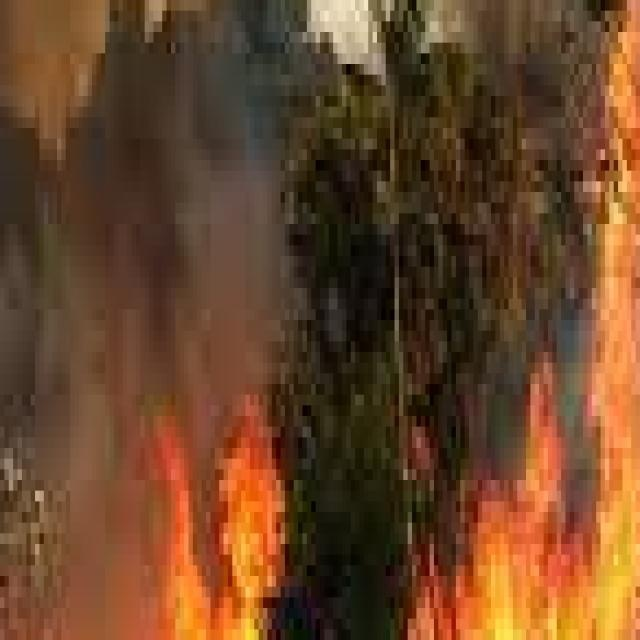

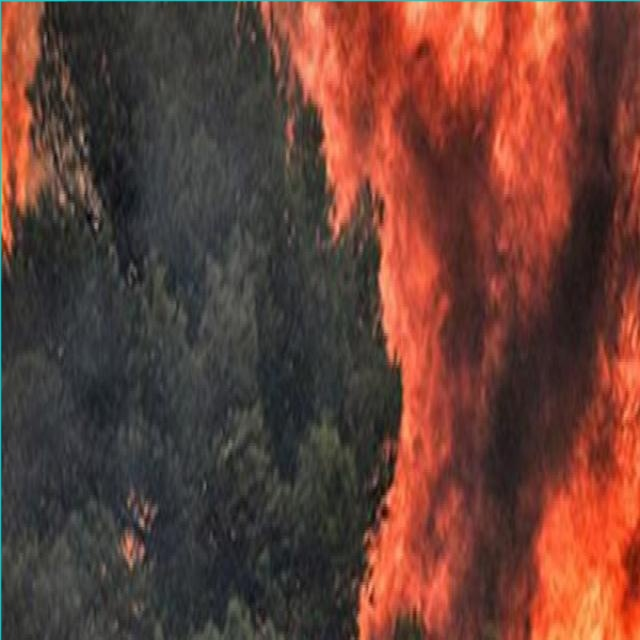

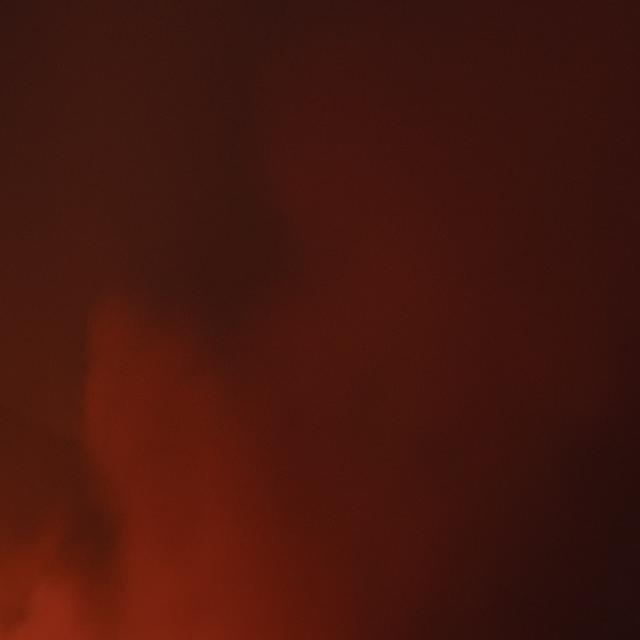

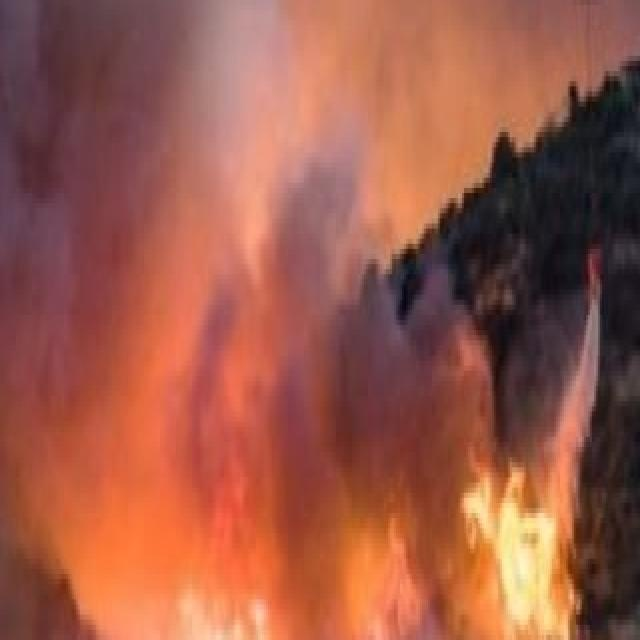

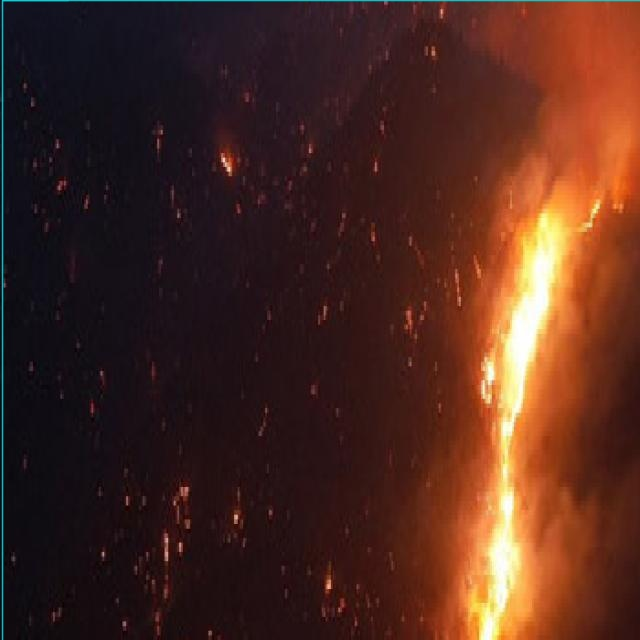

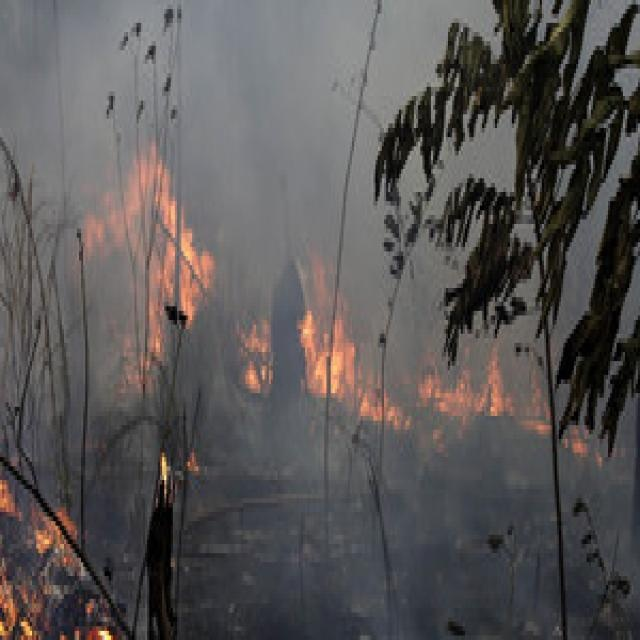

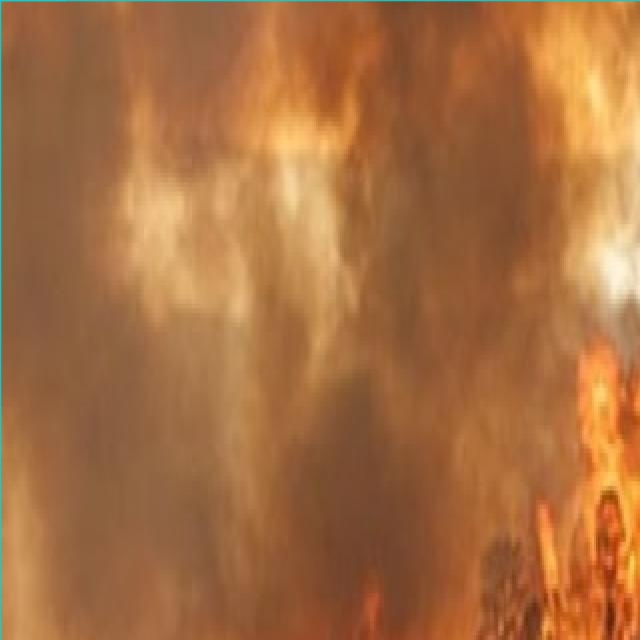

In [90]:
#display inference on ALL test images

import glob
from IPython.display import Image, display

i = 0
limit = 10000 # max images to print
for imageName in glob.glob('/content/yolov7/runs/detect/exp24/*.jpg'): #assuming JPG
    if i < limit:
      display(Image(filename=imageName))
      print("\n")
    i = i + 1


# Reparameterize for Inference

https://github.com/WongKinYiu/yolov7/blob/main/tools/reparameterization.ipynb

# OPTIONAL: Deployment

To deploy, you'll need to export your weights and save them to use later.

In [92]:
# optional, zip to download weights and results locally

!zip -r export.zip runs/detect
!zip -r export.zip runs/train/exp25/weights/best.pt
!zip export.zip runs/train/exp/*

updating: runs/detect/ (stored 0%)
updating: runs/detect/exp2/ (stored 0%)
updating: runs/detect/exp2/LINE_ALBUM_141266_231215_120_jpg.rf.11c39164ae6ae2ba19ae09cbf98ecf8b.jpg (deflated 5%)
updating: runs/detect/exp2/LINE_ALBUM_141266_231215_190_jpg.rf.15b1d26d7fdd434cdea4ed068e0935d9.jpg (deflated 5%)
updating: runs/detect/exp2/LINE_ALBUM_141266_231215_20_jpg.rf.e4b3ed93ee0b08a0c5df6d0f2c3ef075.jpg (deflated 4%)
updating: runs/detect/exp2/LINE_ALBUM_141266_231215_192_jpg.rf.d3c5caf36f571083a7641b1e2b7888e5.jpg (deflated 6%)
updating: runs/detect/exp2/LINE_ALBUM_141266_231215_140_jpg.rf.c4900b365d0b640e7ddadb16e9561620.jpg (deflated 4%)
updating: runs/detect/exp2/LINE_ALBUM_141266_231215_183_jpg.rf.6f35d7ca8915b76f1145b210c7e23a97.jpg (deflated 4%)
updating: runs/detect/exp2/0_jpg.rf.9b241c98c08f62a5c61a62360863b59c.jpg (deflated 4%)
updating: runs/detect/exp2/5d5d43c3109e92507e7c7b32_800x0xcover_AzHPl5_K_jpg.rf.01e42eee439904fc9c15d2645574755a.jpg (deflated 4%)
updating: runs/detect/ex

# OPTIONAL: Active Learning Example

Once our first training run is complete, we should use our model to help identify which images are most problematic in order to investigate, annotate, and improve our dataset (and, therefore, model).

To do that, we can execute code that automatically uploads images back to our hosted dataset if the image is a specific class or below a given confidence threshold.


In [ ]:
# # setup access to your workspace
# rf = Roboflow(api_key="YOUR_API_KEY")                               # used above to load data
# inference_project =  rf.workspace().project("YOUR_PROJECT_NAME")    # used above to load data
# model = inference_project.version(1).model

# upload_project = rf.workspace().project("YOUR_PROJECT_NAME")

# print("inference reference point: ", inference_project)
# print("upload destination: ", upload_project)

In [ ]:
# # example upload: if prediction is below a given confidence threshold, upload it

# confidence_interval = [10,70]                                   # [lower_bound_percent, upper_bound_percent]

# for prediction in predictions:                                  # predictions list to loop through
#   if(prediction['confidence'] * 100 >= confidence_interval[0] and
#           prediction['confidence'] * 100 <= confidence_interval[1]):

#           # upload on success!
#           print(' >> image uploaded!')
#           upload_project.upload(image, num_retry_uploads=3)     # upload image in question